In [8]:
import pandas as pd
import numpy as np

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Drop the specified columns
df = df.drop(columns=['Unnamed: 12', 'Unnamed: 16'])

# Display the cleaned DataFrame
df.head()

,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...


In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import plotly.express as px
import plotly.graph_objects as go

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['foundation & cussion', 'powder'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame for plotting
plot_df = pd.DataFrame(rgb_values, columns=['R', 'G', 'B'])
plot_df['Cluster'] = labels

# Create a 3D scatter plot using Plotly
fig = px.scatter_3d(
    plot_df,
    x='R',
    y='G',
    z='B',
    color='Cluster',
    title='Color Clusters',
    labels={'R': 'Red', 'G': 'Green', 'B': 'Blue'},
    color_continuous_scale='Viridis'
)

# Add cluster centers to the plot
for center in cluster_centers:
    fig.add_trace(go.Scatter3d(
        x=[center[0]],
        y=[center[1]],
        z=[center[2]],
        mode='markers'
        #marker=dict(
        #    size=10,
        #    color='black',
        #    symbol='diamond'
        #),
        #name='Cluster Center'
    ))

# Show the plot
fig.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors
import plotly.graph_objects as go

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['foundation & cussion', 'cheek', 'powder'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Define colors from light to dark using matplotlib's LinearSegmentedColormap
num_clusters = len(cluster_centers)
colors = [mcolors.rgb2hex(cluster_centers[i] / 255) for i in range(num_clusters)]

# Create a Plotly figure for the cluster centers
fig = go.Figure()

# Add scatter trace for cluster centers
for i in range(num_clusters):
    fig.add_trace(go.Scatter3d(
        x=[cluster_centers[i, 0]],
        y=[cluster_centers[i, 1]],
        z=[cluster_centers[i, 2]],
        mode='markers',
        marker=dict(
            size=10,
            color=colors[i],
            opacity=1.0,
            symbol='circle',
            line=dict(
                color='black',
                width=1
            )
        ),
        name=f'Cluster {i}'
    ))

# Set plot layout
fig.update_layout(
    title='Cluster Centers in RGB Space',
    scene=dict(
        xaxis_title='Red',
        yaxis_title='Green',
        zaxis_title='Blue'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the plot
fig.show()


Cluster 0: RGB [0 0 0] -> antiquewhite
Cluster 1: RGB [0 0 0] -> peachpuff
Cluster 2: RGB [0 0 0] -> wheat
Cluster 3: RGB [0 0 0] -> burlywood
Cluster 4: RGB [0 0 0] -> burlywood
Cluster 5: RGB [0 0 0] -> tan
Cluster 6: RGB [0 0 0] -> darksalmon
Cluster 7: RGB [0 0 0] -> rosybrown
Cluster 8: RGB [0 0 0] -> peru
Cluster 9: RGB [0 0 0] -> peru
Cluster 10: RGB [0 0 0] -> sienna
Cluster 11: RGB [0 0 0] -> saddlebrown


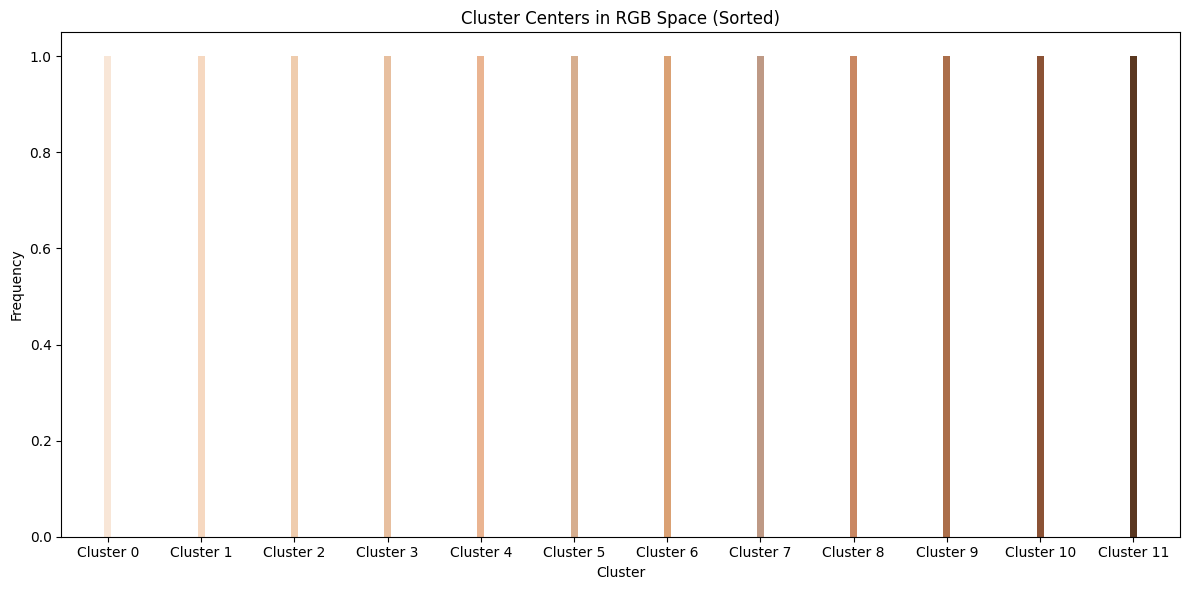

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['foundation & cussion', 'powder'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Define the specific order of clusters from lightest to darkest
cluster_order = [0, 6, 9, 2, 8, 4, 7, 10, 1, 5, 11, 3]

# Sort cluster centers based on the defined order
sorted_cluster_centers = cluster_centers[cluster_order]

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of sorted cluster centers
for i, center in enumerate(sorted_cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert sorted cluster centers to integer RGB values for plotting
cluster_centers_rgb = (sorted_cluster_centers * 255).astype(int)

# Plot the sorted cluster centers as histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space (Sorted)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


In [70]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")
# Drop the specified columns
df = df.drop(columns=['Unnamed: 12', 'Unnamed: 16'])

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['foundation & cussion', 'powder'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)

# Define the specific order of clusters from lightest to darkest
cluster_order = [0, 6, 9, 2, 8, 4, 7, 10, 1, 5, 11, 3]

# Sort cluster centers based on the defined order
sorted_cluster_centers = kmeans.cluster_centers_[cluster_order]

# Function to classify clusters and update DataFrame
def classify_clusters(row):
    if row['Type'] in ['foundation & cussion', 'powder']:
        hex_color = row['Color HEX'].strip()
        rgb_color = hex_to_rgb(hex_color)
        cluster_label = kmeans.predict([rgb_color])[0]
        return f"Cluster {cluster_order.index(cluster_label)}"
    else:
        return np.nan  # Return NaN for non 'foundation & cussion' and 'powder' types

# Apply the function to classify clusters
df['Cluster'] = df.apply(classify_clusters, axis=1)

df.to_csv("foundation.csv")

# LIP & CHEEK

In [62]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
filtered_df['Color HEX'] = filtered_df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = filtered_df[filtered_df['Type'].isin(['lip', 'cheek'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of cluster centers
for i, center in enumerate(cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert cluster centers to integer RGB values for plotting
cluster_centers_rgb = (cluster_centers * 255).astype(int)

# Plot the cluster centers with their color histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


C:\Users\babby\AppData\Local\Temp\ipykernel_2156\755891651.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Cluster 0: RGB [0 0 0] -> antiquewhite
Cluster 1: RGB [0 0 0] -> burlywood
Cluster 2: RGB [0 0 0] -> darksalmon
Cluster 3: RGB [0 0 0] -> palevioletred
Cluster 4: RGB [0 0 0] -> rosybrown
Cluster 5: RGB [0 0 0] -> indianred
Cluster 6: RGB [0 0 0] -> indianred
Cluster 7: RGB [0 0 0] -> crimson
Cluster 8: RGB [0 0 0] -> brown
Cluster 9: RGB [0 0 0] -> brown
Cluster 10: RGB [0 0 0] -> sienna
Cluster 11: RGB [0 0 0] -> darkslategray


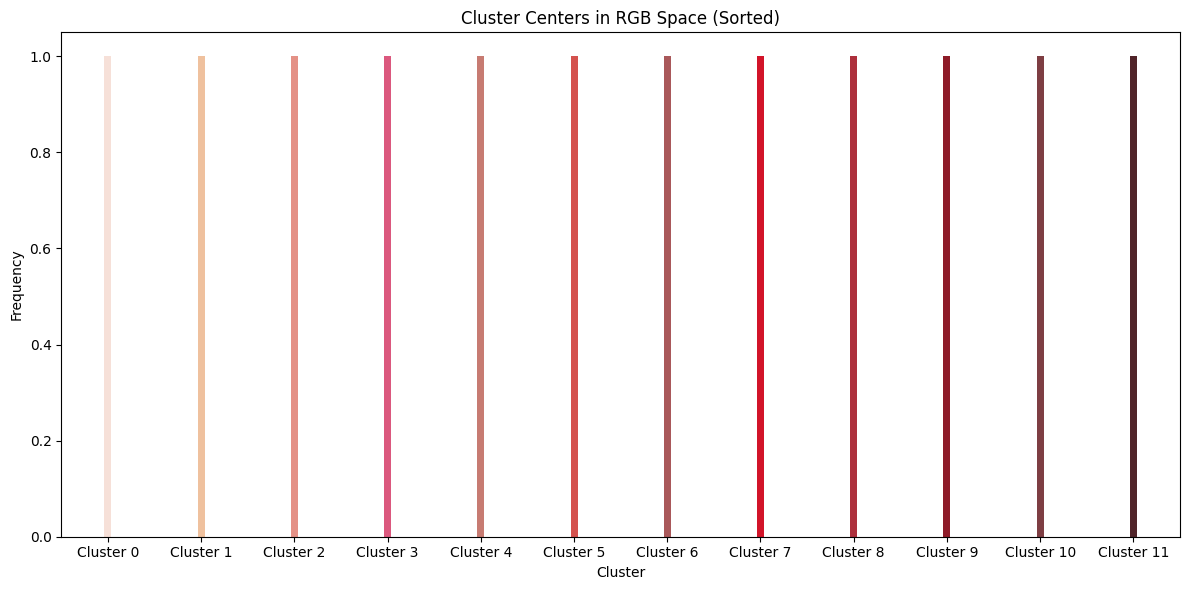

In [71]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


df = pd.read_csv("foundation.csv")
# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['cheek', 'lip'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Define the specific order of clusters from lightest to darkest
cluster_order = [11, 3, 7, 10, 0, 4, 2, 9, 8, 5, 1, 6]

# Sort cluster centers based on the defined order
sorted_cluster_centers = cluster_centers[cluster_order]

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of sorted cluster centers
for i, center in enumerate(sorted_cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert sorted cluster centers to integer RGB values for plotting
cluster_centers_rgb = (sorted_cluster_centers * 255).astype(int)

# Plot the sorted cluster centers as histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space (Sorted)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


In [73]:
# Filter the DataFrame for the desired product types

df = pd.read_csv("foundation.csv")
filtered_df = df[df['Type'].isin(['lip', 'cheek'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)

# Define the specific order of clusters from lightest to darkest
cluster_order = [11, 3, 7, 10, 0, 4, 2, 9, 8, 5, 1, 6]

# Sort cluster centers based on the defined order
sorted_cluster_centers = kmeans.cluster_centers_[cluster_order]

# Function to classify clusters and update DataFrame
def classify_clusters(row):
    if row['Type'] in ['lip', 'cheek']:
        hex_color = row['Color HEX'].strip()
        rgb_color = hex_to_rgb(hex_color)
        cluster_label = kmeans.predict([rgb_color])[0]
        return f"Cluster {cluster_order.index(cluster_label)}"
    else:
        return np.nan  # Return NaN for non 'foundation & cussion' and 'powder' types

# Apply the function to classify clusters
df['Cluster'] = df.apply(classify_clusters, axis=1)
df.to_csv("lip.csv")
df

,Unnamed: 0,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 8
1,1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
2,2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
3,3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
4,4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,Cluster 10
1377,1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 2
1378,1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 0
1379,1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 8


# EYE


Cluster 0: RGB [0 0 0] -> wheat
Cluster 1: RGB [0 0 0] -> darkolivegreen
Cluster 2: RGB [0 0 0] -> slategray
Cluster 3: RGB [0 0 0] -> sienna
Cluster 4: RGB [0 0 0] -> burlywood
Cluster 5: RGB [0 0 0] -> darkgray
Cluster 6: RGB [0 0 0] -> peru
Cluster 7: RGB [0 0 0] -> black
Cluster 8: RGB [0 0 0] -> rosybrown
Cluster 9: RGB [0 0 0] -> darkcyan
Cluster 10: RGB [0 0 0] -> mediumvioletred
Cluster 11: RGB [0 0 0] -> linen


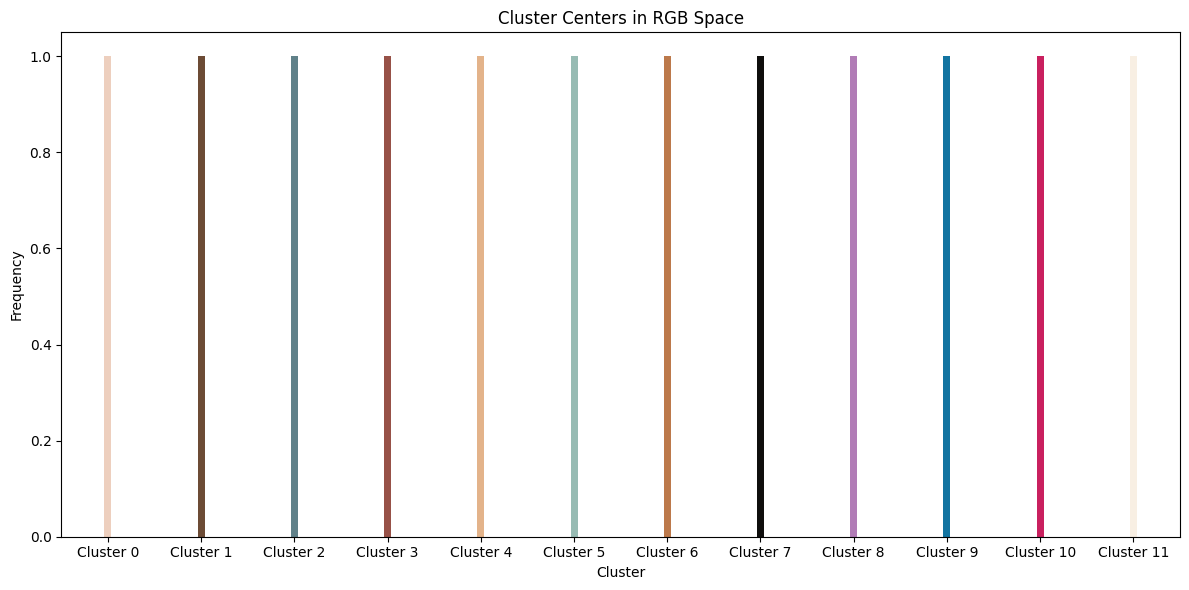

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['eye'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of cluster centers
for i, center in enumerate(cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert cluster centers to integer RGB values for plotting
cluster_centers_rgb = (cluster_centers * 255).astype(int)

# Plot the cluster centers with their color histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


Cluster 0: RGB [0 0 0] -> linen
Cluster 1: RGB [0 0 0] -> wheat
Cluster 2: RGB [0 0 0] -> darkgray
Cluster 3: RGB [0 0 0] -> burlywood
Cluster 4: RGB [0 0 0] -> rosybrown
Cluster 5: RGB [0 0 0] -> peru
Cluster 6: RGB [0 0 0] -> slategray
Cluster 7: RGB [0 0 0] -> sienna
Cluster 8: RGB [0 0 0] -> darkcyan
Cluster 9: RGB [0 0 0] -> mediumvioletred
Cluster 10: RGB [0 0 0] -> darkolivegreen
Cluster 11: RGB [0 0 0] -> black


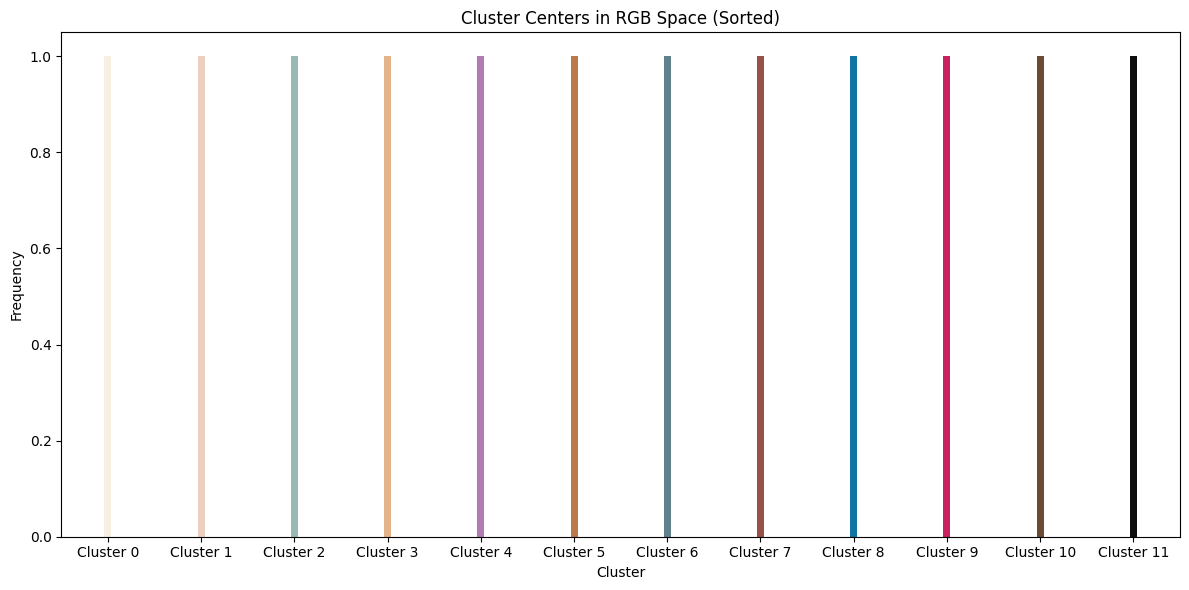

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['eye'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Define the specific order of clusters from lightest to darkest
cluster_order = [11, 0, 5, 4, 8, 6, 2, 3, 9, 10, 1, 7]

# Sort cluster centers based on the defined order
sorted_cluster_centers = cluster_centers[cluster_order]

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of sorted cluster centers
for i, center in enumerate(sorted_cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert sorted cluster centers to integer RGB values for plotting
cluster_centers_rgb = (sorted_cluster_centers * 255).astype(int)

# Plot the sorted cluster centers as histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space (Sorted)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


In [74]:
# Filter the DataFrame for the desired product types

df = pd.read_csv("foundation.csv")
filtered_df = df[df['Type'].isin(['eye'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)

# Define the specific order of clusters from lightest to darkest
cluster_order = [11, 0, 5, 4, 8, 6, 2, 3, 9, 10, 1, 7]

# Sort cluster centers based on the defined order
sorted_cluster_centers = kmeans.cluster_centers_[cluster_order]

# Function to classify clusters and update DataFrame
def classify_clusters(row):
    if row['Type'] in ['eye']:
        hex_color = row['Color HEX'].strip()
        rgb_color = hex_to_rgb(hex_color)
        cluster_label = kmeans.predict([rgb_color])[0]
        return f"Cluster {cluster_order.index(cluster_label)}"
    else:
        return np.nan  # Return NaN for non 'foundation & cussion' and 'powder' types

# Apply the function to classify clusters
df['Cluster'] = df.apply(classify_clusters, axis=1)
df.to_csv("eye.csv")
df

,Unnamed: 0,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
1,1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
2,2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
3,3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
4,4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,NaN
1377,1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1378,1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1379,1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN


# FACE

Cluster 0: RGB [0 0 0] -> darksalmon
Cluster 1: RGB [0 0 0] -> sienna
Cluster 2: RGB [0 0 0] -> burlywood
Cluster 3: RGB [0 0 0] -> antiquewhite
Cluster 4: RGB [0 0 0] -> brown
Cluster 5: RGB [0 0 0] -> brown
Cluster 6: RGB [0 0 0] -> sienna
Cluster 7: RGB [0 0 0] -> indianred
Cluster 8: RGB [0 0 0] -> darkslategray
Cluster 9: RGB [0 0 0] -> rosybrown
Cluster 10: RGB [0 0 0] -> crimson
Cluster 11: RGB [0 0 0] -> wheat


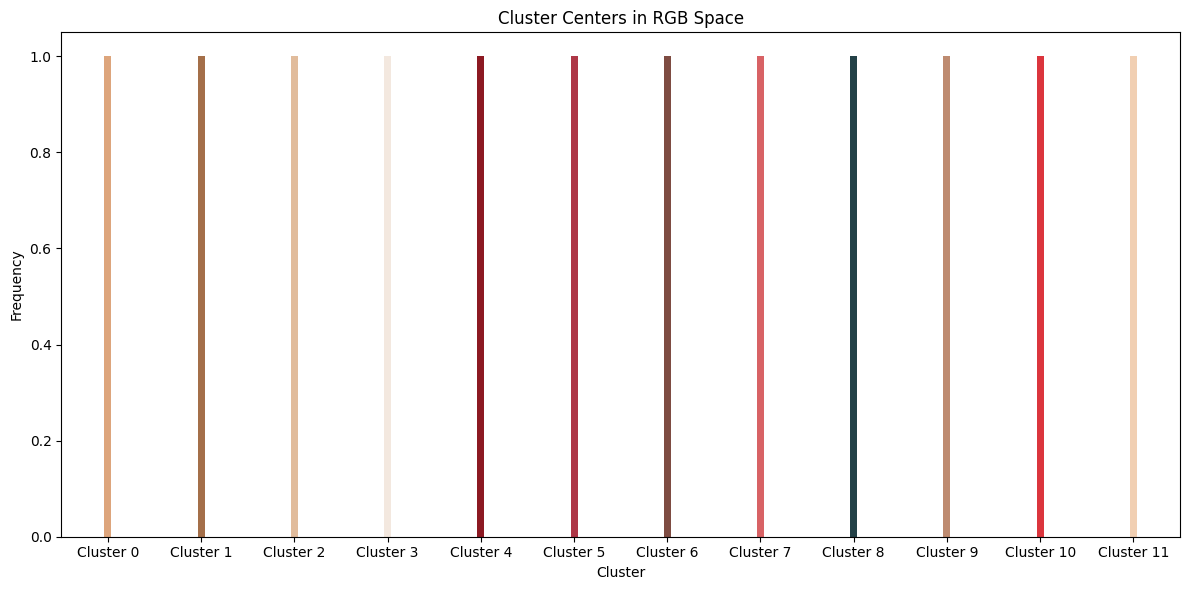

In [50]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['face'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of cluster centers
for i, center in enumerate(cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert cluster centers to integer RGB values for plotting
cluster_centers_rgb = (cluster_centers * 255).astype(int)

# Plot the cluster centers with their color histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


Cluster 0: RGB [0 0 0] -> antiquewhite
Cluster 1: RGB [0 0 0] -> wheat
Cluster 2: RGB [0 0 0] -> burlywood
Cluster 3: RGB [0 0 0] -> darksalmon
Cluster 4: RGB [0 0 0] -> rosybrown
Cluster 5: RGB [0 0 0] -> sienna
Cluster 6: RGB [0 0 0] -> indianred
Cluster 7: RGB [0 0 0] -> crimson
Cluster 8: RGB [0 0 0] -> brown
Cluster 9: RGB [0 0 0] -> sienna
Cluster 10: RGB [0 0 0] -> brown
Cluster 11: RGB [0 0 0] -> darkslategray


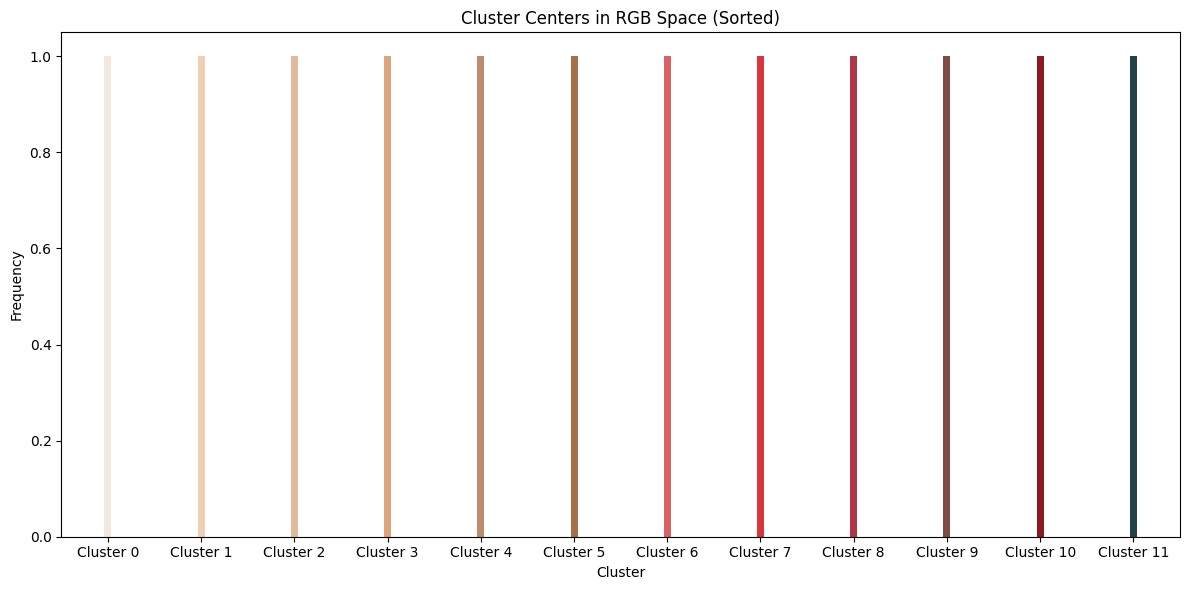

In [56]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the Excel file into a DataFrame
df = pd.read_excel("powder_foundation_cussion_tone_classifier.xlsx")

# Clean the 'Color HEX' column by stripping whitespace characters, including newlines
df['Color HEX'] = df['Color HEX'].str.strip()

# Filter the DataFrame for the desired product types
filtered_df = df[df['Type'].isin(['face'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)
cluster_centers = kmeans.cluster_centers_

# Define the specific order of clusters from lightest to darkest
cluster_order = [3, 11, 2, 0, 9, 1, 7, 10, 5, 6, 4, 8 ]

# Sort cluster centers based on the defined order
sorted_cluster_centers = cluster_centers[cluster_order]

# Function to get human-readable color names
def rgb_to_color_name(rgb):
    closest_color = mcolors.rgb2hex(rgb / 255)  # Convert RGB to 0-1 range before converting to hex
    color_names = mcolors.CSS4_COLORS
    closest_name = ""
    min_dist = float("inf")
    for name, hex_code in color_names.items():
        rgb_code = mcolors.hex2color(hex_code)
        dist = np.linalg.norm(rgb - rgb_code)
        if dist < min_dist:
            closest_name = name
            min_dist = dist
    return closest_name

# Example usage to print color names of sorted cluster centers
for i, center in enumerate(sorted_cluster_centers):
    color_name = rgb_to_color_name(center)
    print(f"Cluster {i}: RGB {center.astype(int)} -> {color_name}")

# Convert sorted cluster centers to integer RGB values for plotting
cluster_centers_rgb = (sorted_cluster_centers * 255).astype(int)

# Plot the sorted cluster centers as histograms
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.9 / len(cluster_centers_rgb)
for i, (rgb, name) in enumerate(zip(cluster_centers_rgb, range(len(cluster_centers_rgb)))):
    ax.bar(i, height=1, width=bar_width, color=mcolors.rgb2hex(rgb / 255))

# Adjust plot settings
ax.set_title('Cluster Centers in RGB Space (Sorted)')
ax.set_xlabel('Cluster')
ax.set_ylabel('Frequency')
ax.set_xticks(np.arange(len(cluster_centers_rgb)))
ax.set_xticklabels([f'Cluster {i}' for i in range(len(cluster_centers_rgb))])
ax.set_xlim(-0.5, len(cluster_centers_rgb) - 0.5)

plt.tight_layout()
plt.show()


In [75]:
# Filter the DataFrame for the desired product types

df = pd.read_csv("foundation.csv")
filtered_df = df[df['Type'].isin(['face'])]

# Extract the color hex values
color_hex_values = filtered_df['Color HEX'].dropna().unique()

# Function to convert hex to RGB
def hex_to_rgb(hex_color):
    return mcolors.hex2color(hex_color)

# Convert the hex values to RGB values
rgb_values = np.array([hex_to_rgb(hex_color) for hex_color in color_hex_values])

# Apply KMeans algorithm to cluster the RGB values into 12 clusters
kmeans = KMeans(n_clusters=12, random_state=42)
kmeans.fit(rgb_values)

# Define the specific order of clusters from lightest to darkest
cluster_order = [3, 11, 2, 0, 9, 1, 7, 10, 5, 6, 4, 8 ]

# Sort cluster centers based on the defined order
sorted_cluster_centers = kmeans.cluster_centers_[cluster_order]

# Function to classify clusters and update DataFrame
def classify_clusters(row):
    if row['Type'] in ['face']:
        hex_color = row['Color HEX'].strip()
        rgb_color = hex_to_rgb(hex_color)
        cluster_label = kmeans.predict([rgb_color])[0]
        return f"Cluster {cluster_order.index(cluster_label)}"
    else:
        return np.nan  # Return NaN for non 'foundation & cussion' and 'powder' types

# Apply the function to classify clusters
df['Cluster'] = df.apply(classify_clusters, axis=1)
df.to_csv("face.csv")

# CLEANING

In [87]:
df_foundation = pd.read_csv('foundation.csv')
df_foundation = df_foundation.drop(columns=['Unnamed: 0'])
df_foundation

,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,NaN
1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN


In [90]:
df_lip = pd.read_csv('lip.csv')

df_lip = df_lip.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_lip

,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 8
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,Cluster 10
1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 2
1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 0
1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 8


In [92]:
df_eye = pd.read_csv('eye.csv')
df_eye = df_eye.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_eye

,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,NaN
1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN


In [95]:
df_face = pd.read_csv('face.csv')
df_face = df_face.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df_face

,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,NaN
1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN
1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,NaN


In [97]:
import pandas as pd

# Load each DataFrame





# Gabungkan DataFrame menggunakan pd.concat
merged_df = pd.concat([df_foundation, df_lip, df_eye, df_face], ignore_index=True)

# Dictionary untuk memetakan tipe produk ke DataFrame yang sesuai
type_to_df = {
    'foundation & cussion': df_foundation,
    'powder': df_foundation,
    'lip': df_lip,
    'cheek': df_lip,
    'eye': df_eye,
    'face': df_face
}

# Loop untuk mengisi nilai yang kosong di kolom 'Cluster' berdasarkan tipe produk
for product_type, df in type_to_df.items():
    mask = merged_df['Type'] == product_type
    merged_df.loc[mask, 'Cluster'] = merged_df.loc[mask, 'Cluster'].fillna(df['Cluster'])

# Hapus baris yang memiliki nilai 'Cluster' NaN
merged_df = merged_df.dropna(subset=['Cluster'])
# Drop the specified columns

# Tampilkan hasil DataFrame setelah penghapusan baris

merged_df = merged_df.drop_duplicates()
merged_df




,Product Title,Brand,Type,Variant Name,Color HEX,Color RGB,Season 1 Name,Season 1 Percent,S1 Closest Color,Season 2 Name,Season 2 Percent,S2 Closest Color,Tone,Product URL,Image URL,Cluster
0,Matte Lip Cream,wardah,lip,Red-dicted\t,#a92431,"(169, 36, 49)",autumn warm,74.697169,"[156.0, 35.0, 53.0]",summer cool,25.302831,"[152.0, 42.0, 85.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 8
1,Matte Lip Cream,wardah,lip,Fuschionately,#d04483,"(208, 68, 131)",winter deep,69.550194,"[205.0, 52.0, 135.0]",summer soft,30.449806,"[177.0, 89.0, 123.0]",dark_deep,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
2,Matte Lip Cream,wardah,lip,See You Latte,#c5807d,"(197, 128, 125)",summer soft,79.845008,"[197.0, 121.0, 125.0]",autumn soft,20.154992,"[224.0, 134.0, 127.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
3,Matte Lip Cream,wardah,lip,Pink Me,#d86d8c,"(216, 109, 140)",summer soft,59.121401,"[228.0, 106.0, 154.0]",summer soft,40.878599,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 3
4,Matte Lip Cream,wardah,lip,Speachless,#d87a71,"(216, 122, 113)",autumn soft,52.811055,"[224.0, 134.0, 127.0]",summer soft,47.188945,"[197.0, 121.0, 125.0]",medium_tan,https://www.wardahbeauty.com/id/product/make-u...,https://d2jlkn4m127vak.cloudfront.net/medias/p...,Cluster 4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376,Color Sensational®,maybelline,lip,Plum Passion,#902472,"(144, 36, 114)",winter cool,54.328589,"[134.0, 42.0, 91.0]",summer cool,45.671411,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-line...,https://www.maybelline.com/-/media/project/lor...,Cluster 10
1377,Baby Lips Dr Rescue,maybelline,lip,Coral Crave,#FF8C99,"(255, 140, 153)",spring clear,55.325255,"[253.0, 167.0, 165.0]",spring light,44.674745,"[255.0, 176.0, 146.0]",medium_tan,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 2
1378,Baby Lips®,maybelline,lip,Quenched,#fff0f0,"(255, 240, 240)",winter cool,70.160247,"[255.0, 233.0, 242.0]",spring light,29.839753,"[239.0, 239.0, 234.0]",fair_light,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 0
1379,Baby Lips®,maybelline,lip,Cherry Me,#a12d53,"(161, 45, 83)",summer cool,50.000000,"[152.0, 42.0, 85.0]",winter deep,50.000000,"[152.0, 42.0, 85.0]",dark_deep,https://www.maybelline.com/lip-makeup/lip-balm...,https://www.maybelline.com/-/media/project/lor...,Cluster 8


In [99]:
merged_df.to_excel("tes.xlsx", index=False)

In [102]:
final =pd.read_excel("tes.xlsx")
final.to_csv("FINAL_BENERAN_YA ALLAH_AAMIIN.csv", index=False)